## Project Overview

This notebook continues from the exploratory data analysis (EDA) to build a predictive model for real estate sale prices using the dataset `real-estate-sales-2001-2022`.

The primary goal of this notebook is to use machine learning techniques to **predict property sale prices** based on various features such as floor area, town, property type, and transaction date.

The key steps of this notebook include:

**Data Preparation**  
- Handling missing values, duplicates, and data types.  
- Encoding categorical variables and selecting relevant features.

**Feature Engineering**  
- Extracting year and month from sale dates.  
- Creating new features (e.g., price per sqm if needed).

**Data Splitting**  
- Splitting the dataset into training and testing sets.

**Model Training**  
- Training a **Linear Regression** model to predict property prices.

**Evaluation**  
- Measuring model performance using **R² score** and **Root Mean Squared Error (RMSE)**.

In [55]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load cleaned dataset

df = pd.read_csv("clean_data.csv", low_memory=False)

In [8]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Latitude,Longitude
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,41.350140,-73.068220
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,41.773453,-72.879116


In [5]:
# DEFINE FEATURES & TARGET

features = ['Assessed Value', 'List Year', 'Town', 'Property Type', 'Residential Type']
target = 'Sale Amount'

In [7]:
print("=== INITIAL DATA CHECK ===")
print(f"Initial data shape: {df.shape}")
print(f"\nMissing values per column:")
print(df.isnull().sum())

=== INITIAL DATA CHECK ===
Initial data shape: (1097629, 12)

Missing values per column:
Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    398389
Latitude            799518
Longitude           799518
dtype: int64


In [9]:
# DATA PREPROCESSING
# Convert List Year to datetime and extract year

df['List Year'] = pd.to_datetime(df['List Year'], errors='coerce')
df = df.dropna(subset=['List Year'])  # remove failed parsing
df['List Year'] = df['List Year'].dt.year.astype(int)

In [11]:
# Remove rows with empty target

df = df.dropna(subset=[target])

In [13]:
# Remove rows with empty important features
df = df.dropna(subset=features)

print(f"\n=== AFTER CLEANING ===")
print(f"Data shape after cleaning: {df.shape}")
print(f"Missing values per column:")
print(df.isnull().sum())


=== AFTER CLEANING ===
Data shape after cleaning: (699240, 12)
Missing values per column:
Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  4
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type            0
Residential Type         0
Latitude            485149
Longitude           485149
dtype: int64


In [15]:
# ENCODE CATEGORICAL VARIABLES
# Convert categorical to dummy variables

df = pd.get_dummies(df, columns=['Town', 'Property Type', 'Residential Type'], drop_first=True)

In [17]:
# PREPARE X AND y
# Take all columns except target and unnecessary columns

columns_to_drop = [target, 'Date Recorded', 'Address']

# Only drop columns that exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

In [19]:
X = df.drop(columns=columns_to_drop)
y = df[target]

print(f"\n=== FINAL DATA ===")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Features: {list(X.columns)}")


=== FINAL DATA ===
X shape: (699240, 184)
y shape: (699240,)
Features: ['Serial Number', 'List Year', 'Assessed Value', 'Sales Ratio', 'Latitude', 'Longitude', 'Town_Andover', 'Town_Ansonia', 'Town_Ashford', 'Town_Avon', 'Town_Barkhamsted', 'Town_Beacon Falls', 'Town_Berlin', 'Town_Bethany', 'Town_Bethel', 'Town_Bethlehem', 'Town_Bloomfield', 'Town_Bolton', 'Town_Bozrah', 'Town_Branford', 'Town_Bridgeport', 'Town_Bridgewater', 'Town_Bristol', 'Town_Brookfield', 'Town_Brooklyn', 'Town_Burlington', 'Town_Canaan', 'Town_Canterbury', 'Town_Canton', 'Town_Chaplin', 'Town_Cheshire', 'Town_Chester', 'Town_Clinton', 'Town_Colchester', 'Town_Colebrook', 'Town_Columbia', 'Town_Cornwall', 'Town_Coventry', 'Town_Cromwell', 'Town_Danbury', 'Town_Darien', 'Town_Deep River', 'Town_Derby', 'Town_Durham', 'Town_East Granby', 'Town_East Haddam', 'Town_East Hampton', 'Town_East Hartford', 'Town_East Haven', 'Town_East Lyme', 'Town_East Windsor', 'Town_Eastford', 'Town_Easton', 'Town_Ellington', 'Town_En

In [21]:
# CHECK FINAL MISSING VALUES

print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")


Missing values in X: 970298
Missing values in y: 0


In [23]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
print(f"\n=== TRAIN-TEST SPLIT ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


=== TRAIN-TEST SPLIT ===
X_train shape: (559392, 184)
X_test shape: (139848, 184)
y_train shape: (559392,)
y_test shape: (139848,)


In [27]:
# If there are NaN values, show which columns

if X_train.isnull().sum().sum() > 0:
    print("\nColumns with NaN in X_train:")
    nan_cols = X_train.isnull().sum()
    print(nan_cols[nan_cols > 0])


Columns with NaN in X_train:
Latitude     388082
Longitude    388082
dtype: int64


In [29]:
# Check data types

print(f"\nData types in X_train:")
print(X_train.dtypes.value_counts())


Data types in X_train:
bool       178
float64      4
int64        1
int32        1
Name: count, dtype: int64


In [31]:
# Check for non-numeric columns

non_numeric = X_train.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print(f"\nNon-numeric columns: {list(non_numeric)}")
    print("These need to be converted to numeric!")


Non-numeric columns: ['Town_Andover', 'Town_Ansonia', 'Town_Ashford', 'Town_Avon', 'Town_Barkhamsted', 'Town_Beacon Falls', 'Town_Berlin', 'Town_Bethany', 'Town_Bethel', 'Town_Bethlehem', 'Town_Bloomfield', 'Town_Bolton', 'Town_Bozrah', 'Town_Branford', 'Town_Bridgeport', 'Town_Bridgewater', 'Town_Bristol', 'Town_Brookfield', 'Town_Brooklyn', 'Town_Burlington', 'Town_Canaan', 'Town_Canterbury', 'Town_Canton', 'Town_Chaplin', 'Town_Cheshire', 'Town_Chester', 'Town_Clinton', 'Town_Colchester', 'Town_Colebrook', 'Town_Columbia', 'Town_Cornwall', 'Town_Coventry', 'Town_Cromwell', 'Town_Danbury', 'Town_Darien', 'Town_Deep River', 'Town_Derby', 'Town_Durham', 'Town_East Granby', 'Town_East Haddam', 'Town_East Hampton', 'Town_East Hartford', 'Town_East Haven', 'Town_East Lyme', 'Town_East Windsor', 'Town_Eastford', 'Town_Easton', 'Town_Ellington', 'Town_Enfield', 'Town_Essex', 'Town_Fairfield', 'Town_Farmington', 'Town_Franklin', 'Town_Glastonbury', 'Town_Goshen', 'Town_Granby', 'Town_Greenw

In [33]:
# QUICK FIX FOR REMAINING NaN

print("\n=== QUICK FIX ===")


=== QUICK FIX ===


In [35]:
# Remove rows with NaN

if X_train.isnull().sum().sum() > 0 or y_train.isnull().sum() > 0:
    print("Removing rows with NaN...")

Removing rows with NaN...


In [37]:
# FINAL CHECK BEFORE TRAINING

print(f"\n=== FINAL CHECK ===")
print(f"NaN in X_train: {X_train.isnull().sum().sum()}")
print(f"NaN in y_train: {y_train.isnull().sum()}")
print(f"Infinite values in X_train: {np.isinf(X_train).sum().sum()}")
print(f"Infinite values in y_train: {np.isinf(y_train).sum()}")


=== FINAL CHECK ===
NaN in X_train: 776164
NaN in y_train: 0
Infinite values in X_train: 0
Infinite values in y_train: 0


In [39]:
# Recombine X and y so they can drop NaN together

train_df = pd.concat([X_train, y_train], axis=1)

In [41]:
# Drop all rows containing NaN

train_df = train_df.dropna()

In [43]:
# Re-split X_train and y_train

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

print(f"NaN in X_train: {X_train.isnull().sum().sum()}")
print(f"NaN in y_train: {y_train.isnull().sum()}")

NaN in X_train: 0
NaN in y_train: 0


In [51]:
# Combine X_test and y_test to clean NaN
test_df = pd.concat([X_test, y_test], axis=1)

# Drop all rows containing NaN
test_df = test_df.dropna()

#Re-separate
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

In [45]:
# TRAINING MODEL

print("\n=== TRAINING MODEL ===")
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model trained successfully!")


=== TRAINING MODEL ===
✅ Model trained successfully!


In [47]:
# Evaluate on training set

train_score = model.score(X_train, y_train)
print(f"Training R² score: {train_score:.4f}")

Training R² score: 0.1180


In [53]:
# Predict and evaluate on test set

y_pred = model.predict(X_test)
test_score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R² score: {test_score:.4f}")
print(f"Test RMSE: {rmse:.2f}")


Test R² score: 0.2854
Test RMSE: 627731.69


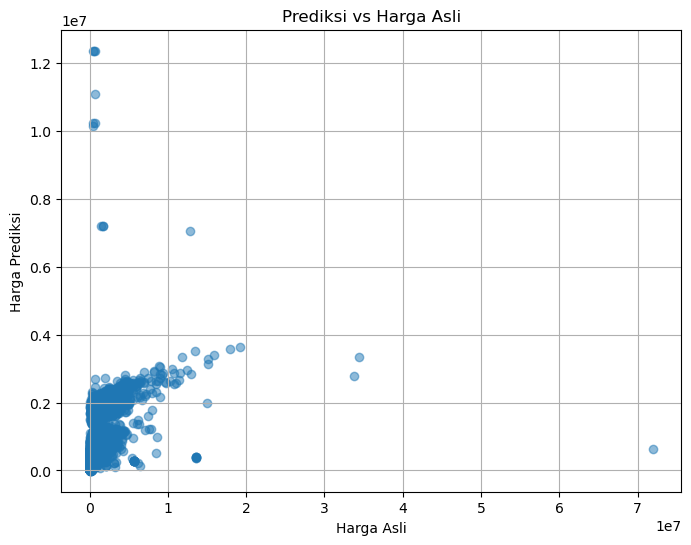

In [59]:
# Visualize prediction vs actual

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Harga Asli")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Harga Asli")
plt.grid(True)
plt.show()

## Conclusion & Next Steps

### Prediction Results:
- **Test R² score:** 0.2854  
- **Test RMSE:** 627,731.69  

### Interpretation:

- The **R² score of 0.285** indicates that the model can only explain **28.5%** of the variance in property sale prices. This means that while some relationships were captured, the model misses significant underlying patterns.
- The **RMSE of ~627K** suggests that predictions are, on average, off by a large margin — especially if typical property prices are within the 500K–1M range.

### Identified Limitations:
- Outliers and extreme values may be impacting model performance.
- Categorical features might not be fully or properly encoded.
- Linear regression is likely **too simple** to model complex real estate relationships.
- Some important real estate factors (like building age, location desirability, amenities, etc.) are missing.

### Future Improvements:

#### Switch to **non-linear models** such as:
- Random Forest Regressor
- Gradient Boosting Regressor

  
#### Apply **better feature engineering**, such as:
- Time-based features (sale month, year)
- Price per square meter

#### **Treat outliers** and normalize skewed data.
- Use **pipelines** for preprocessing + modeling.
- Add more **external data sources** (e.g., economic indicators, interest rates).
